In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/mnt/kauffman/joosts/projects/STRT_epidermis/scripts'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from EPI_misc_scripts_v1_1 import *
from EPI_affinity_propagation_v1_0 import *
from EPI_neg_binom_regression_v1_1 import *
from EPI_pseudotemporal_ordering_v1_0 import *
from EPI_gene_neighbor_network_v1_0 import *

Couldn't import dot_parser, loading of dot files will not be possible.


In [5]:
import matplotlib as mpl

# Initialize engines

In [6]:
from ipyparallel import Client

In [7]:
c = Client(profile='default')

In [8]:
dview = c[:]

In [9]:
dview.execute('import sys')
dview.execute('sys.path.append("/mnt/kauffman/joosts/projects/STRT_epidermis/scripts")')
dview.execute('from EPI_misc_scripts_v1_1 import *')
dview.execute('from EPI_affinity_propagation_v1_0 import *')
dview.execute('from EPI_neg_binom_regression_v1_1 import *')
dview.execute('from EPI_pseudotemporal_ordering_v1_0 import *')
dview.execute('from EPI_gene_neighbor_network_v1_0 import *')

<AsyncResult: execute>

# Import Data

In [10]:
exp_id = '201509151726'
path_input = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_input/v1.8'
path_output = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_output/v1.8'
path_figures = '/mnt/kauffman/joosts/projects/STRT_epidermis/figures/v1.8'

In [11]:
seq = loadData_v1(path_input, exp_id, 'seq', 'DataFrame')
meta = loadData_v1(path_input, exp_id, 'meta', 'DataFrame')

In [12]:
s_groups_1st = loadData_v1(path_output, exp_id, 's_groups_1st', 'Series')
g_groups_1st = loadData_v1(path_output, exp_id, 'g_groups_1st', 'Series')

In [13]:
s_groups_2nd = loadData_v1(path_output, exp_id, 's_groups_2nd', 'Series')

In [14]:
NBR_2nd_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_2nd_summary')
NBR_2nd_bin_zero = loadData_from_pickle_v1(path_output, exp_id,'NBR_2nd_bin_zero')
NBR_2nd_size_zero = loadData_from_pickle_v1(path_output, exp_id,'NBR_2nd_size_zero')
NBR_2nd_bin_bl = loadData_from_pickle_v1(path_output, exp_id,'NBR_2nd_bin_bl')
NBR_2nd_size_bl = loadData_from_pickle_v1(path_output, exp_id,'NBR_2nd_size_bl')

### Colormaps

In [15]:
cmap_2nd = {0:'#33a02c',
            1:'#b2df8a',
            2:'#00FF00',
            3:'#FFE000',
            4:'#FF9900',
            5:'#FF3300',
            6:'#CC0000',
            7:'#CC0066',
            8:'#FF99CC',
            9:'#FFCCCC',
            10:'#D2C5E1',
            11:'#A68BC2',
            12:'#6a3d9a',
            13:'#2A183E',
            14:'#000066',
            15:'#0000FF',
            16:'#33CCFF',
            17:'#99CCFF',
            18:'#666699',
            19:'#000066',
            20:'#33CCCC',
            21:'#00FFFF',
            22:'#006666',
            23:'#FF99CC',
            24:'#660033'}

In [16]:
markers_2nd = {0: 'o',
            1: 'o',
            2: 'o',
            3:'s',
            4:'s',
            5:'s',
            6:'s',
            7:'^',
            8:'^',
            9:'^',
            10:'^',
            11:'^',
            12:'^',
            13:'^',
            14:'s',
            15:'D',
            16:'D',
            17:'D',
            18:'D',
            19:'D',
            20:'H',
            21:'H',
            22:'H',
            23:'s',
            24:'s'}

In [17]:
markers_2nd_size = {0:750,
            1:750,
            2:750,
            3:750,
            4:750,
            5:750,
            6:750,
            7:750,
            8:750,
            9:750,
            10:750,
            11:750,
            12:750,
            13:750,
            14:750,
            15:500,
            16:500,
            17:500,
            18:500,
            19:500,
            20:750,
            21:750,
            22:750,
            23:750,
            24:750}

In [18]:
nmap_2nd_short = {0:'IFE B I',
                  1:'IFE B II',
                  2:'INFU B',
                  3:'IFE D I',
                  4:'IFE D II',
                  5:'IFE K I',
                  6:'IFE K II',
                  7:'uHF I',
                  8:'uHF II',
                  9:'uHF III',
                  10:'uHF IV',
                  11:'uHF V',
                  12:'uHF VI',
                  13:'uHF VII',
                  14:'SG',
                  15:'OB I',
                  16:'OB II',
                  17:'OB III',
                  18:'OB IV',
                  19:'OB V',
                  20:'IB I',
                  21:'IB II',
                  22:'IB III',
                  23:'TC',
                  24:'LH'}

# Functional gene expression

In [19]:
NBR_2nd_size_zero[NBR_2nd_size_zero=='n.s'] = 0
NBR_2nd_size_bl[NBR_2nd_size_bl=='n.s'] = 0

# Wnt pathway

In [20]:
Wnt = ['Dkk1',
         'Dkk3',
         'Porcn',
         'Sfrp1',
         'Sfrp2',
         'Sfrp4',
         'Wif1',
         'Wnt1',
         'Wnt2',
         'Wnt2b',
         'Wnt3',
         'Wnt3a',
         'Wnt4',
         'Wnt5a',
         'Wnt5b',
         'Wnt6',
         'Wnt7a',
         'Wnt7b',
         'Wnt8a',
         'Wnt8b',
         'Wnt9a',
         'Wnt10a',
         'Wnt11',
         'Wnt16', 
         'Frzb',
         'Fzd1',
         'Fzd2',
         'Fzd3',
         'Fzd4',
         'Fzd5',
         'Fzd6',
         'Fzd7',
         'Fzd8',
         'Fzd9',
         'Kremen1',
         'Lrp5',
         'Lrp6',
         'Lgr4',
         'Lgr5',
         'Lgr6',
         'Aes',
         'Apc',
         'Axin1',
         'Axin2',
         'Bcl9',
         'Btrc',
         'Ccnd1',
         'Csnk1a1',
         'Csnk2a1',
         'Ctbp1',
         'Ctnnb1',
         'Ctnnbip1',
         'Daam1',
         'Dixdc1',
         'Dvl1',
         'Dvl2',
         'Ep300',
         'Fbxw11',
         'Frat1',
         'Gsk3b',
         'Lef1',
         'Mapk8',
         'Nfatc1',
         'Nkd1',
         'Nlk',
         'Prickle1',
         'Pygo1',
         'Rhoa',
         'Rhou',
         'Ruvbl1',
         'Tcf7',
         'Tcf7l1'
         'Tle1'
         'Vangl2']

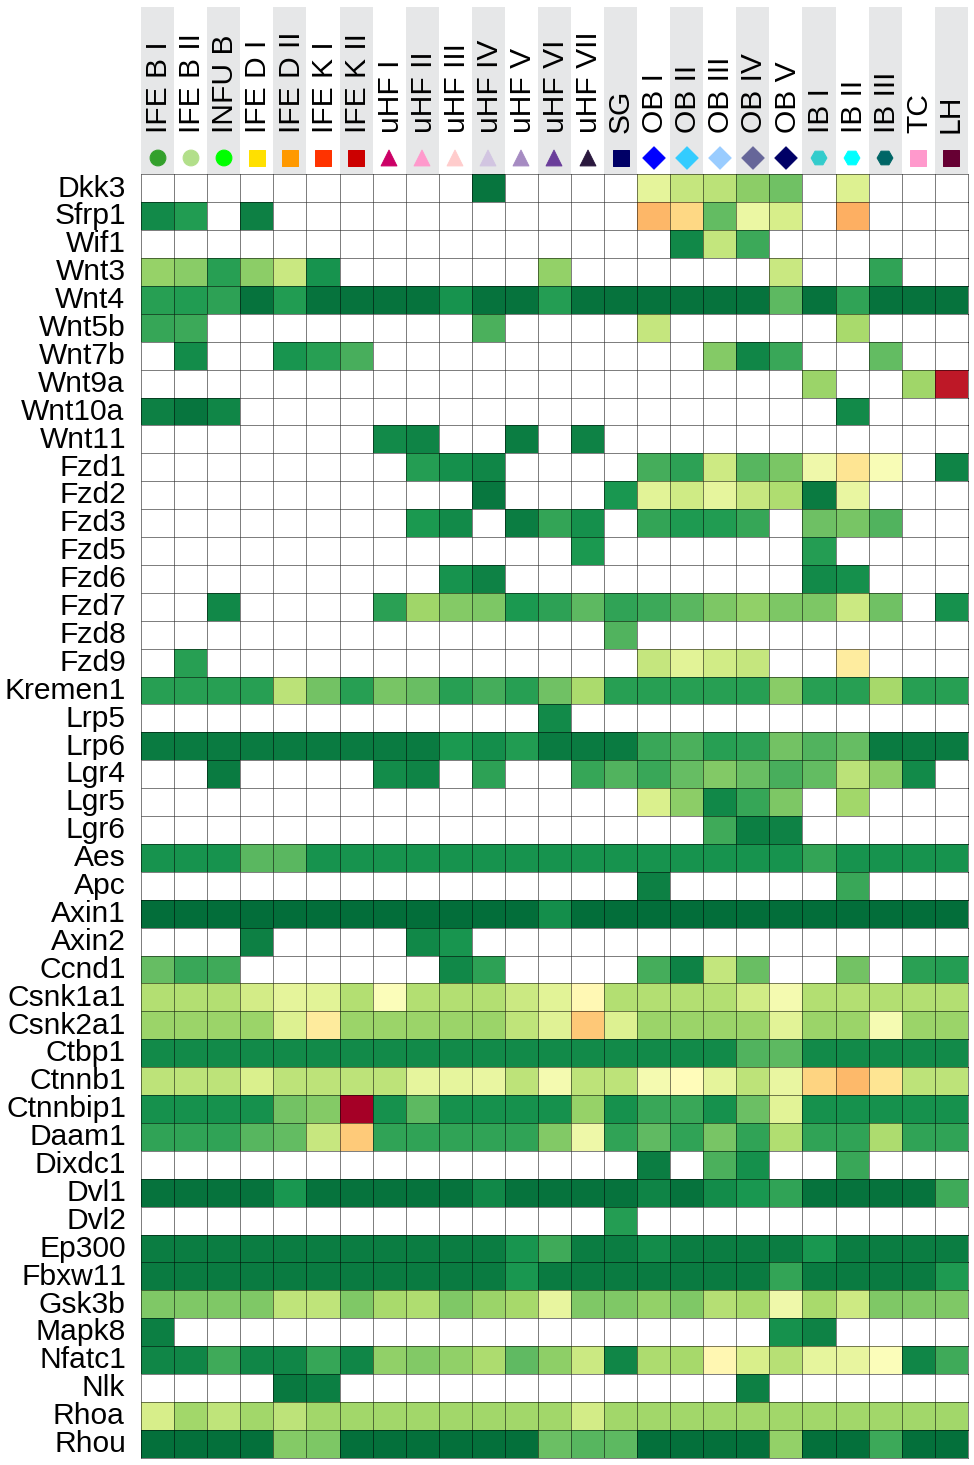

In [120]:
#VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = Wnt
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_A_Wnt_signaling.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

"        \nfigname = 'v1.8_7_A1_Wnt_signaling.pdf'\nplt.savefig('%s/%s' % (path_figures, figname), \n            format = 'pdf', \n            transparent = True, \n            bbox_inches = 'tight', \n            pad_inches = 0, \n            rasterized = True)\n"

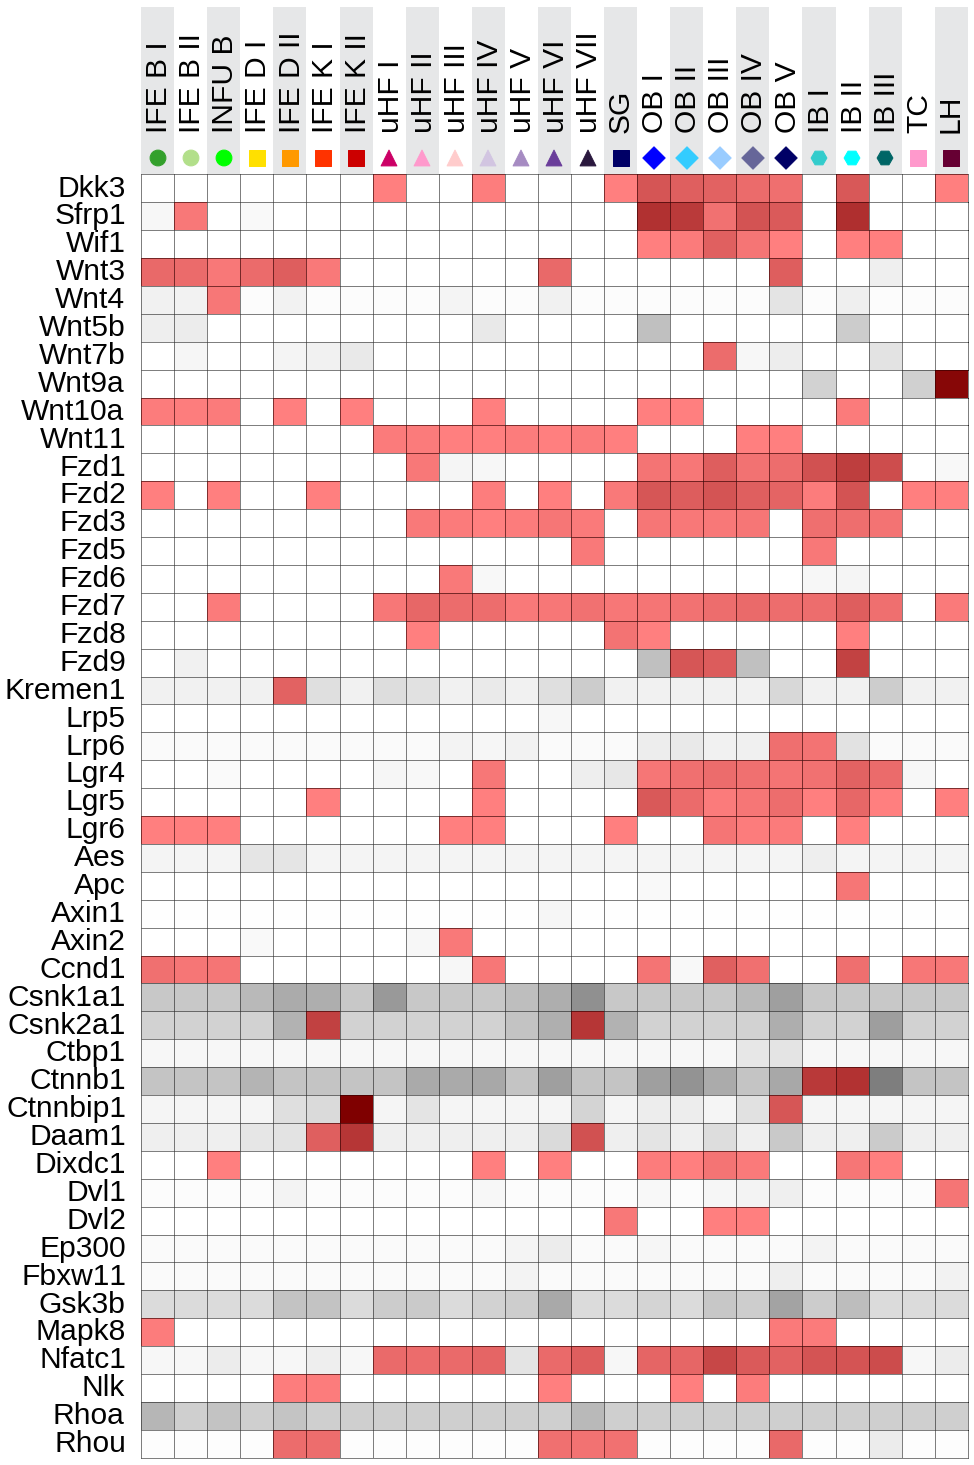

In [42]:
#VERSION B

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
data_bl = NBR_2nd_bin_bl
genes = Wnt
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.Greys
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        if data_bl.ix[g, gr] == 1:
        
            ax.axvspan(col, col + 1, color = 'r', alpha = 0.5)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
"""        
figname = 'v1.8_7_A1_Wnt_signaling.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)
"""

# Transcription factors

In [43]:
TF_mm9 = open('%s/TF_mm9.txt' % path_input,'r').read().split()
TF_mm9.sort()

"        \nfigname = 'v1.7b_S7_Transcription_factors.pdf'\nplt.savefig('%s/%s' % (path_figures, figname), \n            format = 'pdf', \n            transparent = True, \n            bbox_inches = 'tight', \n            pad_inches = 0, \n            rasterized = True)\n"

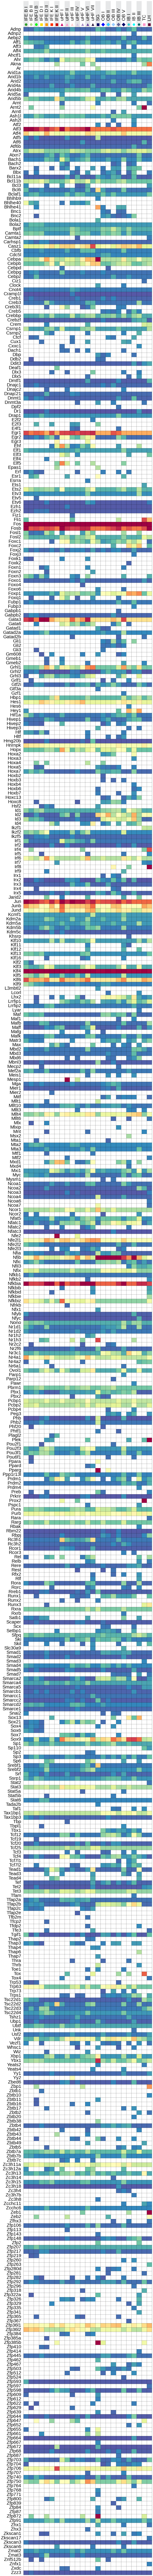

In [60]:
#VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = TF_mm9
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
"""        
figname = 'v1.7b_S7_Transcription_factors.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)
"""

# Hedgehog

In [48]:
Hh = ['Dhh',
      'Hhat',
      'Hhip',
      'Ihh',
      'Shh',
      'Disp1',
      'Disp2',
      'Boc',
      'Cdon',
      'Gas1',
      'Lrp2',
      'Ptch1',
      'Ptch2',
      'Ptchd2',
      'Ptchd3',
      'Rab23',
      'Smo',
      'Btrc',
      'Csnk1a1',
      'Csnk1e',
      'Fbxw11',
      'Fkbp8',
      'Gli1',
      'Gli2',
      'Gli3',
      'Otx2'
      'Prkaca',
      'Prkacb',
      'Stk36',
      'Shox2'
      'Sufu',
      'Zic1',
      'Zic2']

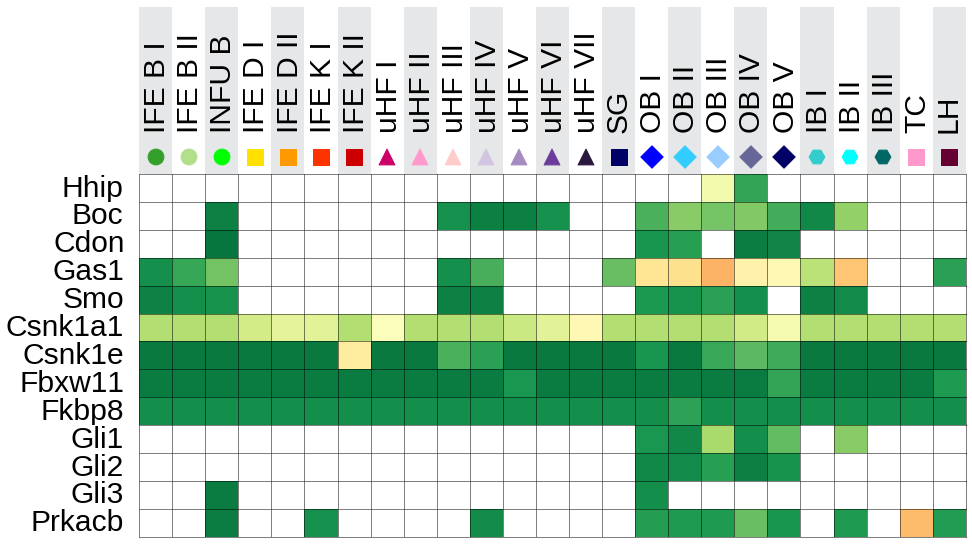

In [122]:
#VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = Hh
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_A_Hedgehog_signaling.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# BMP / TGF-beta pathway

In [50]:
Bmp = ['Bmp1',
         'Bmp2',
         'Bmp3',
         'Bmp4',
         'Bmp5',
         'Bmp6',
         'Bmp7',
         'Gdf1',
         'Gdf2',
         'Gdf3',
         'Gdf5',
         'Gdf6',
         'Gdf7',
         'space',
         'Amhr2',
         'Bmpr1a',
         'Bmpr1b',
         'Bmpr2']

In [51]:
Tgfb = ['Tgfb1',
         'Tgfb2',
         'Tgfb3',
         'space',
         'Tgfbr1',
         'Tgfbr2',
         'Tgfbr3']

In [52]:
TgfbBmp = ['Bambi',
           'Chrd', 
           'Dcn', 
           'Fst', 
           'Lefty1', 
           'Ltbp1', 
           'Ltbp2', 
           'Ltbp4', 
           'Nog', 
           'Tdgf1', 
           'Tgfbi', 
           'Tgfbrap1', 
           'Thbs1',
           'Crebbp',
           'Dlx2',
           'Ep300',
           'Fos', 
           'Gsc', 
           'Id1', 
           'Jun', 
           'Junb', 
           'Myc', 
           'Runx1', 
           'Smad1', 
           'Smad2', 
           'Smad3', 
           'Smad4', 
           'Smad5',
           'Smad6',
           'Smad7', 
           'Sox4', 
           'Stat1', 
           'Tgfb1i1', 
           'Tsc22d1']

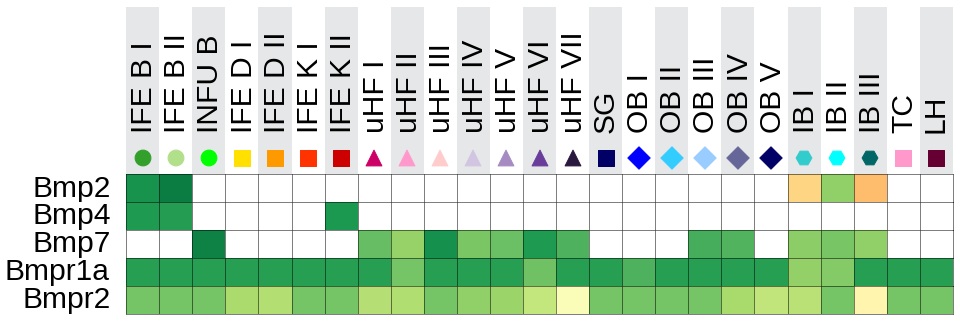

In [123]:
#VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = Bmp
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_A_Bmp_signaling.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

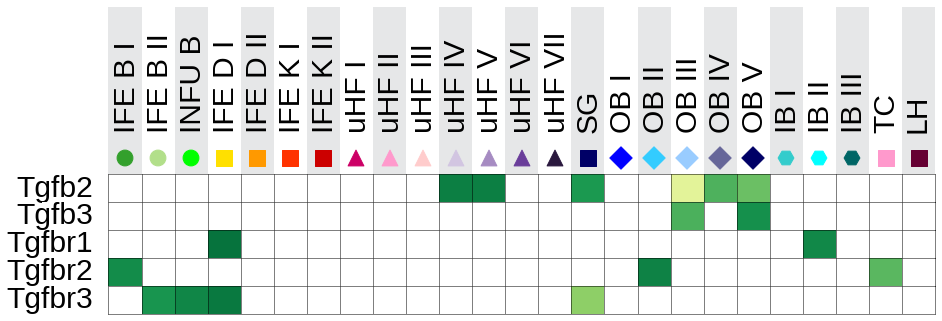

In [124]:
#VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = Tgfb
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_A_Tgfb_signaling.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

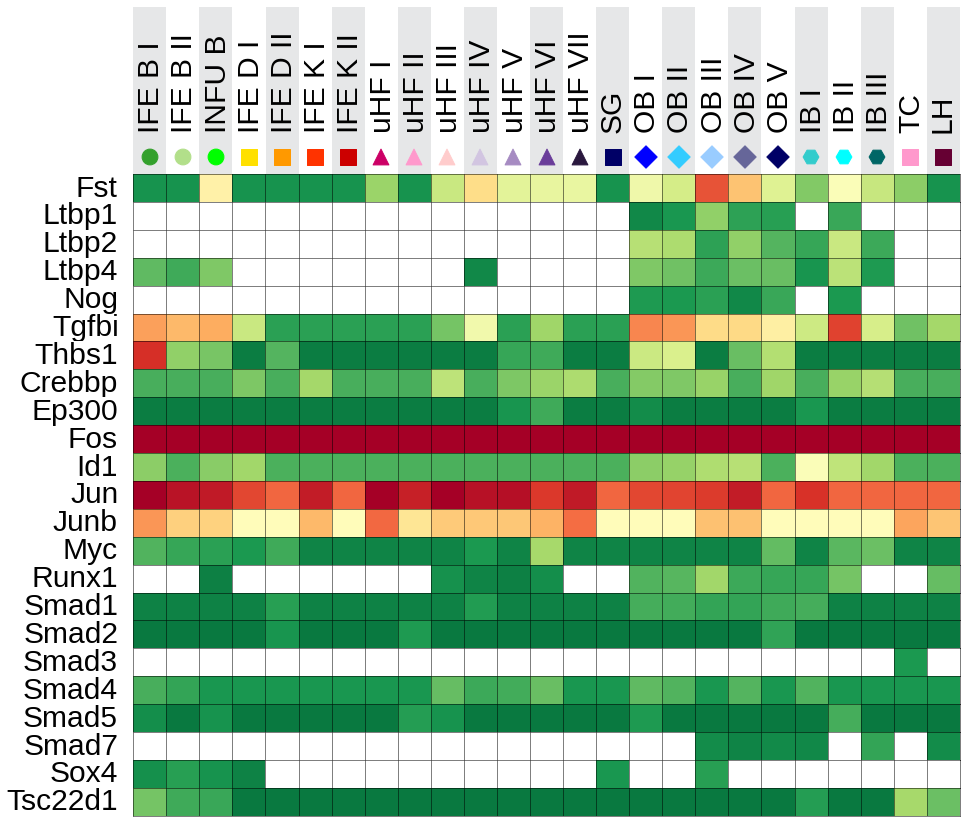

In [141]:
#VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = TgfbBmp
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_A_Tgfb_Bmp_shared.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Notch

In [56]:
Notch = ['Dll1', 
         'Dll3', 
         'Dll4', 
         'Jag1', 
         'Jag2', 
         'Notch1', 
         'Notch2', 
         'Notch3', 
         'Notch4',         
         'Adam10', 
         'Adam17', 
         'Dtx1'
         'Ep300', 
         'Lfng',
         'Maml1', 
         'Maml2', 
         'Mfng',
         'Ncstn', 
         'Ncor2', 
         'Numb', 
         'Psen1', 
         'Psen2', 
         'Psenen',
         'Rfng',
         'Rbpjl', 
         'Snw1']

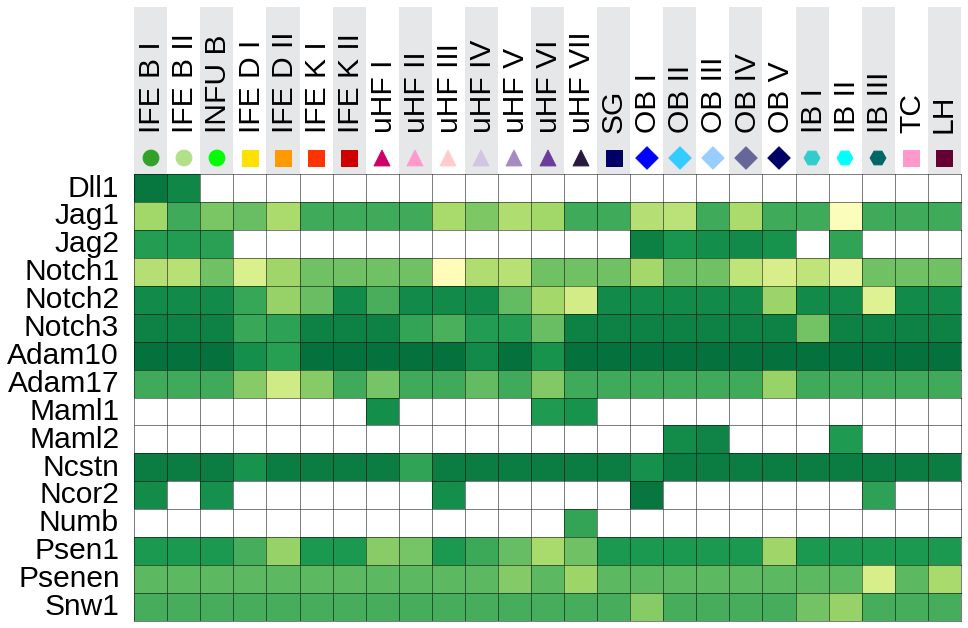

In [142]:
#VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = Notch
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
      
figname = 'v1.8_7_A_Notch.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# NFKB 

In [58]:
NFKB = ['Ccl2',
'Csf2',
'Fasl',
'Ifng',
'Il10',
'Il1a',
'Il1b',
'Lta',
'Tnf',
'Tnfsf10',
'Tnfsf14',
'Card10',
'Cd40',
'Cd27',
'Egfr',
'F2r',
'Il1r1',
'Ltbr',
'Nod1',
'Tlr9',
'Tnfrsf10b',
'Tnfrsf1a',
'Tnfrsf1b',
'Tlr1',
'Tlr2',
'Tlr3',
'Tlr4',
'Tlr6',
'Fadd',
'Irak1',
'Irak2',
'Irf1',
'Map3k1',
'Mapk3',           
'Myd88',
'Ripk1',
'Ripk2',
'Tradd',
'Traf2',
'Traf3',
'Traf5',
'Traf6',
'Tnfaip3',
'Tollip']

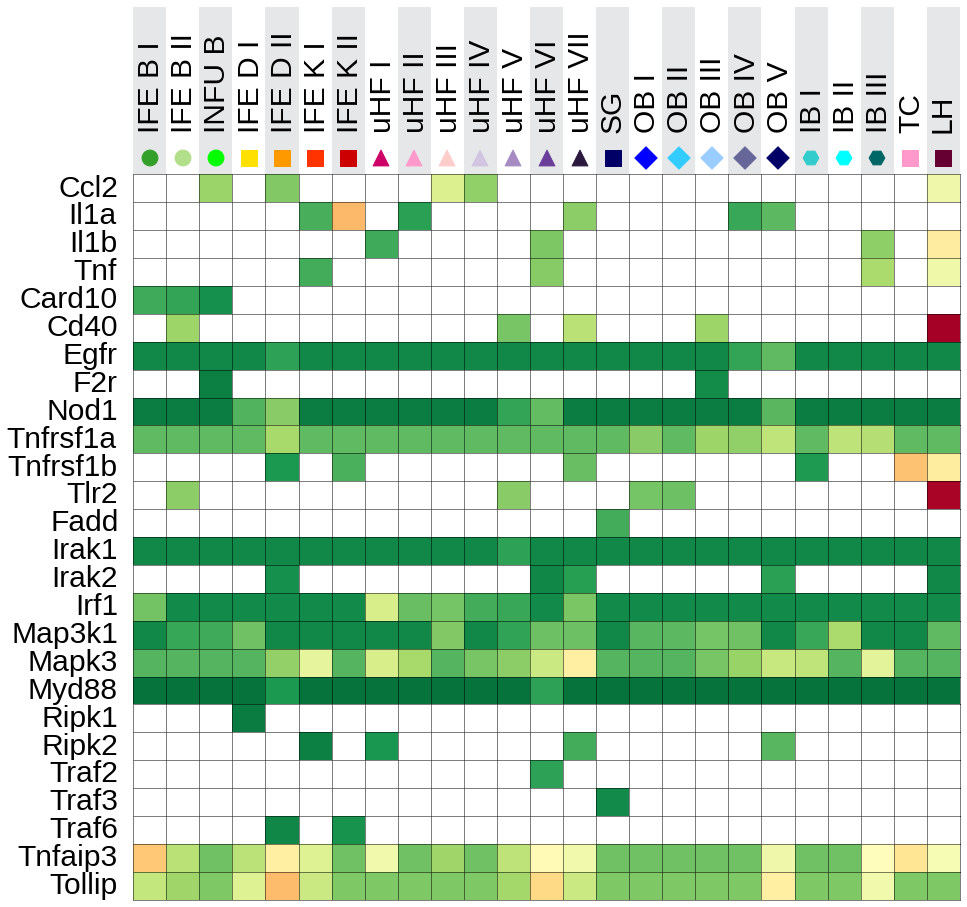

In [127]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = NFKB
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_A_NFKB.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Cell adhesion

# Tight junction

In [67]:
TJ = ['Cldn1', 
      'Cldn2', 
      'Cldn3', 
      'Cldn4', 
      'Cldn5', 
      'Cldn6', 
      'Cldn7', 
      'Cldn8', 
      'Cldn9', 
      'Cldn10', 
      'Cldn11', 
      'Cldn12', 
      'Cldn14', 
      'Cldn15', 
      'Cldn16', 
      'Cldn17', 
      'Cldn18', 
      'Cldn19', 
      'Esam', 
      'F11r', 
      'Icam1', 
      'Icam2', 
      'Jam2', 
      'Jam3', 
      'Ocln',
      'Tjp1',
      'Tjp2', 
      'Tjp3']

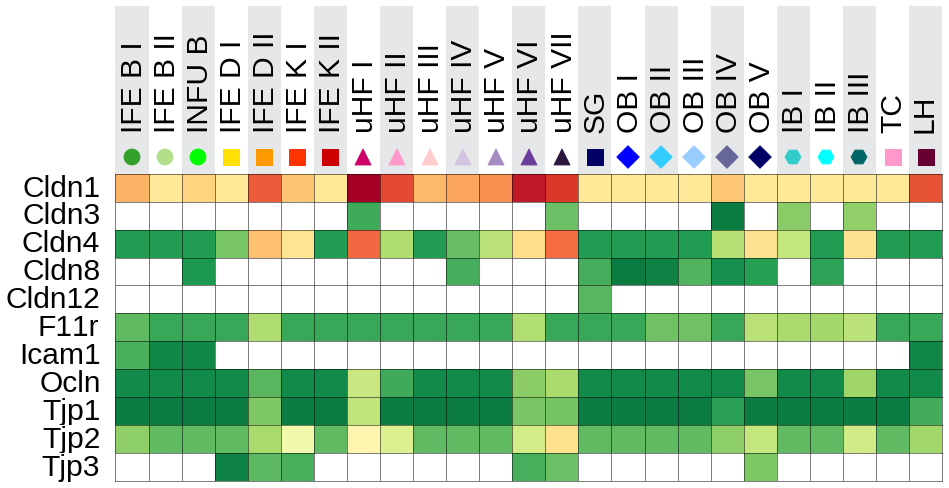

In [128]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = TJ
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_B_Tight_junctions.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Focal adhesion

In [69]:
FA = ['Cav1',
      'Cav2',
      'Cav3',
      'Itga1',
      'Itga2',
      'Itga3',
      'Itga4',
      'Itga5',
      'Itga6',
      'Itga7',
      'Itga8',
      'Itga9', 
      'Itgal', 
      'Itgam', 
      'Itgav', 
      'Itgb1', 
      'Itgb2', 
      'Itgb3', 
      'Itgb4', 
      'Itgb5', 
      'Itgb6']

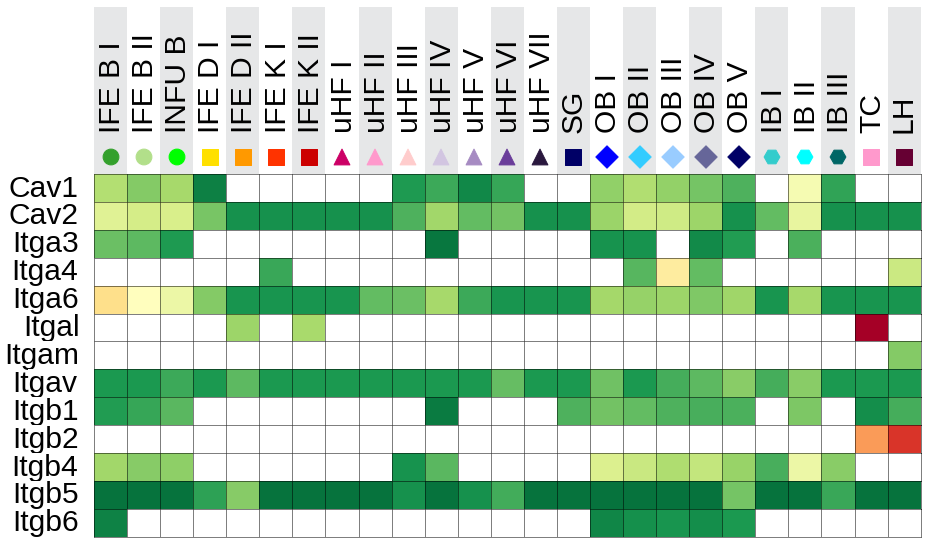

In [129]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = FA
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_B_Focal_adhesion.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Gap junctions

In [74]:
GJ = ['Gja1', 
      'Gja3', 
      'Gja4', 
      'Gja5', 
      'Gja8', 
      'Gjb1', 
      'Gjb2', 
      'Gjb3', 
      'Gjb4', 
      'Gjb5', 
      'Gjb6', 
      'Gjc2', 
      'Gjd2', 
      'Gje1']

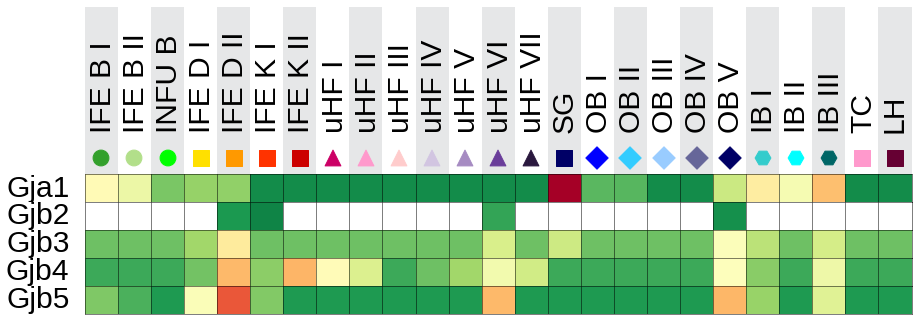

In [130]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = GJ
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_B_Gap_junctions.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Adherens junction

In [76]:
AJ = ['Cdh1', 
      'Cdh2', 
      'Dll1', 
      'Notch1', 
      'Notch2', 
      'Notch3', 
      'Notch4',
      'Pvrl1', 
      'Pvrl2', 
      'Pvrl4']

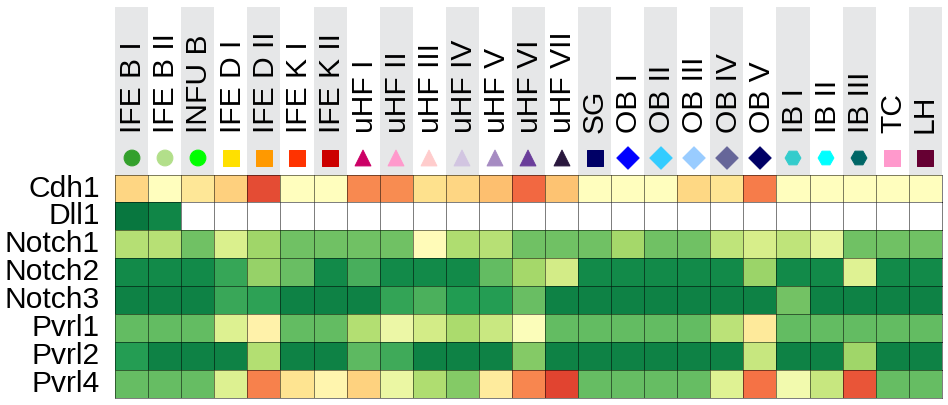

In [131]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = AJ
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_B_Adherens_junctions.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Desmosomes

In [78]:
Des = ['Dsc1', 
       'Dsc2', 
       'Dsc3', 
       'Dsg1a', 
       'Dsg2', 
       'Dsg3',
       'Dsg4',
       'Dsp', 
       'Jup']

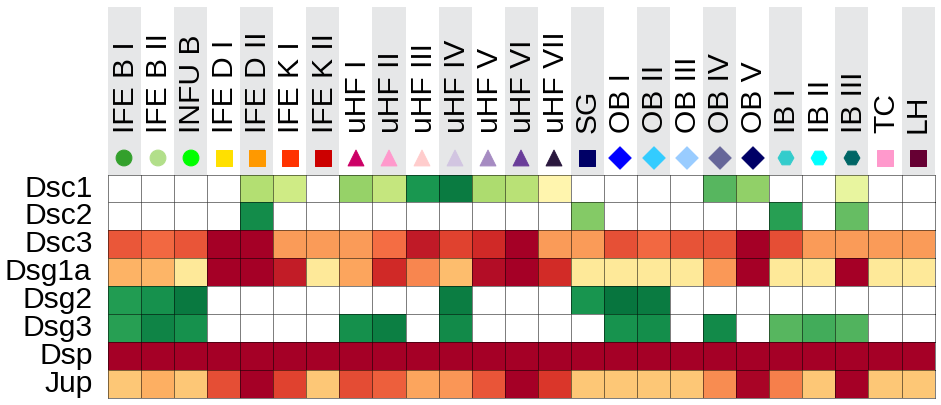

In [132]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = Des
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_B_Desmosomes.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Hemidesmosomes

In [80]:
Hemi = ['Dst', 
        'Plec']

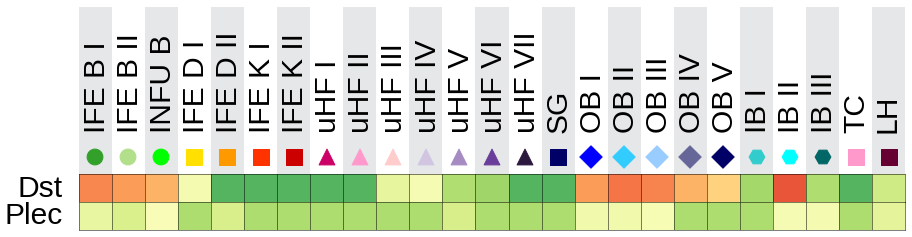

In [133]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = Hemi
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_B_Hemidesmosomes.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Extracellular matrix

# Collagens

In [82]:
Collagens = ['Col1a1',
'Col1a2',
'Col2a1',
'Col3a1',
'Col4a1',
'Col4a2',
'Col4a3',
'Col4a4',
'Col4a5',
'Col4a6',
'Col5a1',
'Col5a2',
'Col5a3',
'Col6a1',
'Col6a2',
'Col6a3',
'Col6a5',
'Col6a6',
'Col8a1',
'Col8a2',
'Col9a1',
'Col9a2',
'Col9a3',
'Col10a1',
'Col11a1',
'Col11a2',
'Col15a1',
'Col17a1',
'Col18a1',
'Col20a1',
'Col24a1',
'Col27a1',
'Col28a1']

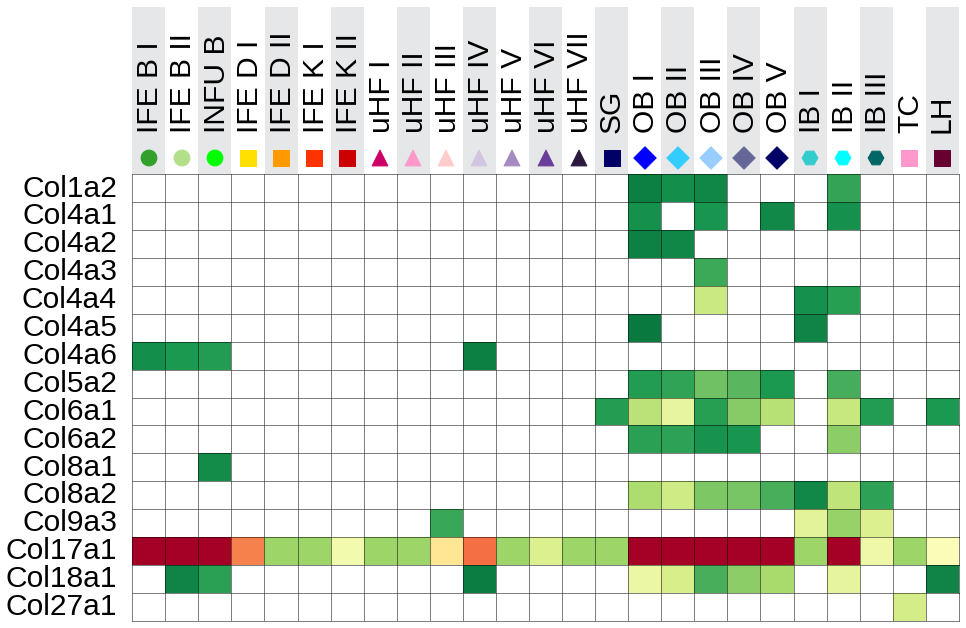

In [134]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = Collagens
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_C_Collagens.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Laminins

In [84]:
Laminins = ['Lama1',
'Lama2',
'Lama3',
'Lama4',
'Lama5',
'Lamb1',
'Lamb2',
'Lamb3',
'Lamb4',
'Lamc1',
'Lamc2',
'Lamc3']

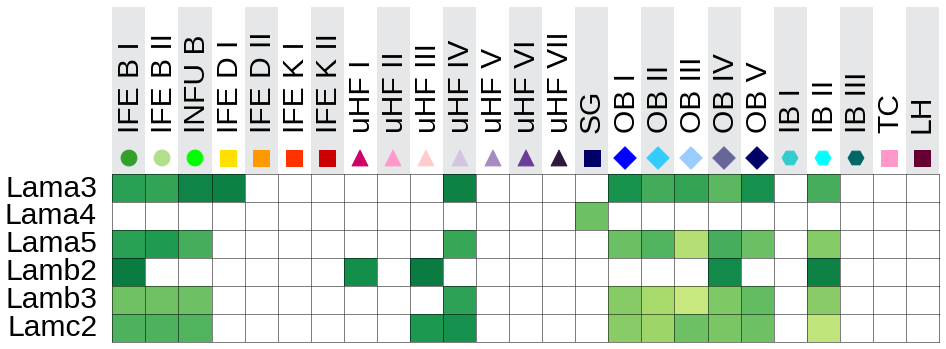

In [135]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = Laminins
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_C_Laminins.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# ECM Proteases

In [86]:
ECM_proteases = ['Adamts1',
'Adamts2',
'Adamts4',
'Adamts5',
'Adamts8',
'Adamts9',
'Adamts13',
'Adamts15',
'Adamts16',
'Adamts17',
'Adamts18',
'Adamts19',
'Adamts20',
'Adamtsl1',
'Adamtsl3',
'Adamtsl4',
'Adamtsl5',
'Cp',
'Mmp1a',
'Mmp2',
'Mmp3',
'Mmp7',
'Mmp8',
'Mmp9',
'Mmp10',
'Mmp11',
'Mmp12',
'Mmp13',
'Mmp14',
'Mmp15',
'Mmp16',
'Mmp17',
'Mmp20',
'Mmp23',
'Mmp24',
'Mmp25',
'Mmp27',
'Mmp28',
'Thsd4']

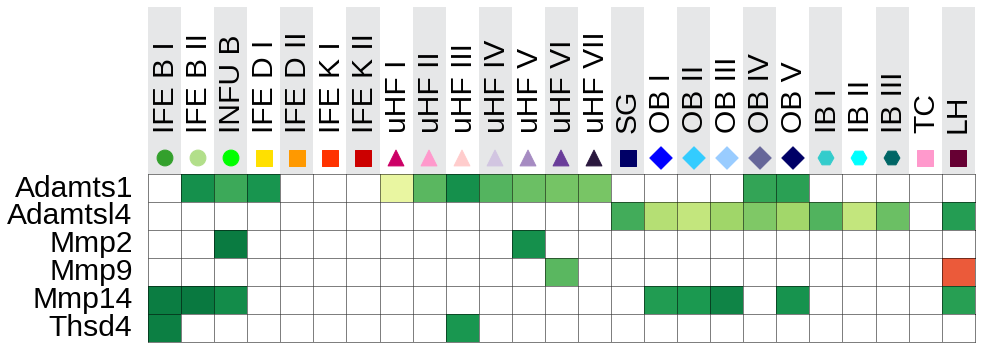

In [136]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = ECM_proteases
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_C_ECM_Proteases.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# ECM Protease inhibitors

In [88]:
ECM_protease_inhibitors = ['Timp1',
'Timp2',
'Timp3']

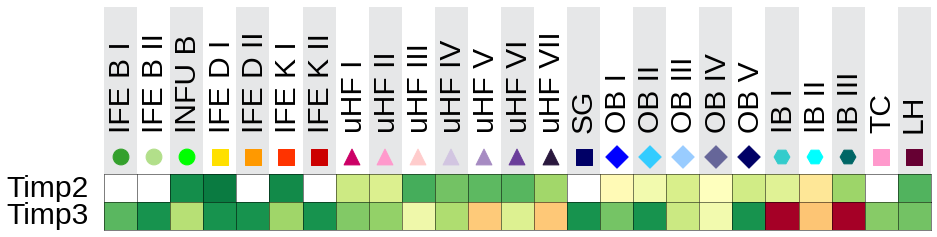

In [137]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = ECM_protease_inhibitors
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_C_ECM_Protease_inhibitors.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# ECM glycoproteins

In [90]:
ECM_glyco = ['Acan',
'Agrn',
'Ahsg',
'Bcan',
'Bmper',
'Chrd',
'Crim1',
'Edil3',
'Emilin1',
'Fbln1',
'Fbn1',
'Fbn2',
'Fcgbp',
'Fn1',
'Gp9',
'Hapln1',
'Hapln2',
'Hapln3',
'Hapln4',
'Lepre1',
'Leprel1',
'Leprel2',
'Ltbp1',
'Ltbp4',
'Mfap2',
'Mfap3',
'Mfap3l',
'Mfap5',
'Msln',
'Mslnl',
'Muc2',
'Muc5ac',
'Muc5b',
'Muc6',
'Muc19',
'Ncan',
'Nid1',
'Nid2',
'Otoa',
'Otog',
'Otogl',
'Papln',
'Sepp1',
'Sparc',
'Sparcl1',
'Strc',
'Tecta',
'Vcan',
'Vwf',
'Zan']

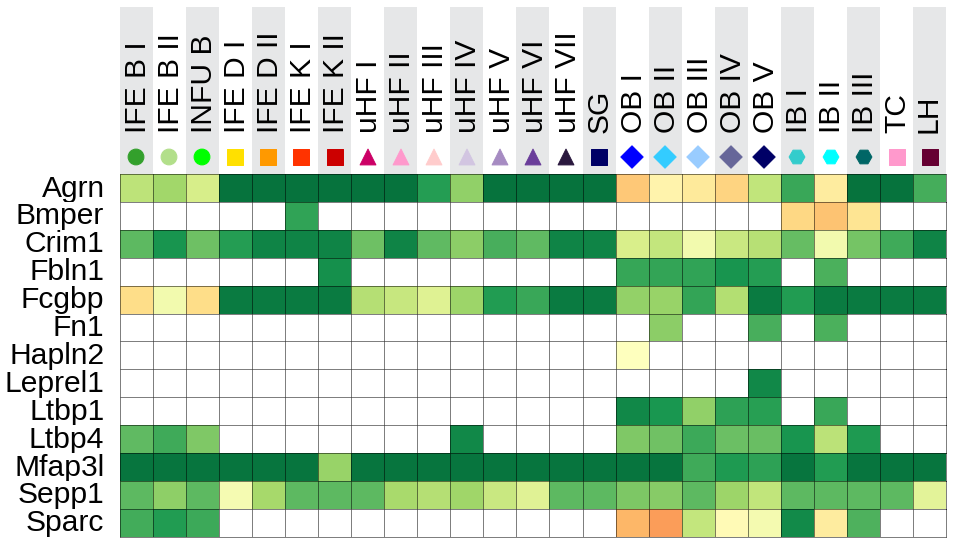

In [138]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = ECM_glyco
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_C_ECM_Glycoproteins.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Other ECM proteins

In [92]:
ECM_other = ['Ambn',
'Aspn',
'Astl',
'Atrn',
'Atrnl1',
'Bglap',
'Bglap-rs1',
'Bglap2',
'Bgn',
'C1qtnf7',
'Chad',
'Cntnap4',
'Cntnap5a',
'Cntnap5b',
'Cntnap5c',
'Colec12',
'Colq',
'Ctgf',
'Cubn',
'Dcn',
'Dlk1',
'Ecm1',
'Ecm2',
'Egfl6',
'Epyc',
'Flrt1',
'Flrt2',
'Flrt3',
'Fmod',
'Gas6',
'Gm884',
'Hephl1',
'Hmcn1',
'Hspg2',
'Ibsp',
'Islr',
'Islr2',
'Kera',
'Lrrc4',
'Lrrc4b',
'Lrrc4c',
'Lrrc9',
'Lrrc15',
'Lrrc19',
'Lrrc32',
'Lrrc37a',
'Lrrc66',
'Lrriq1',
'Lrrn4',
'Lrrn4cl',
'Lrrtm1',
'Lrrtm3',
'Lrrtm4',
'Lrtm1',
'Lum',
'Mep1b',
'Megf6',
'Megf8',
'Megf9',
'Megf10',
'Megf11',
'Mep1a',
'Mfge8',
'Msr1',
'Neto1',
'Npnt',
'Nrp1',
'Nrp2',
'Nrros',
'Nrxn1',
'Nrxn2',
'Nrxn3',
'Ntn1',
'Ntn3',
'Ntn4',
'Ntn5',
'Ntng1',
'Ntng2',
'Nyx',
'Oc90',
'Ogn',
'Omd',
'Optc',
'Otol1',
'Pelp1',
'Pcolce',
'Pcolce2',
'Podn',
'Podnl1',
'Postn',
'Prelp',
'Prg2',
'Prg3',
'Rtn4r',
'Rtn4rl2',
'Scara3',
'Scara5',
'Slit1',
'Slit2',
'Slit3',
'Stab1',
'Stab2',
'Tpbgl',
'Ush2A',
'Wisp1',
'Wisp2',
'Wisp3']

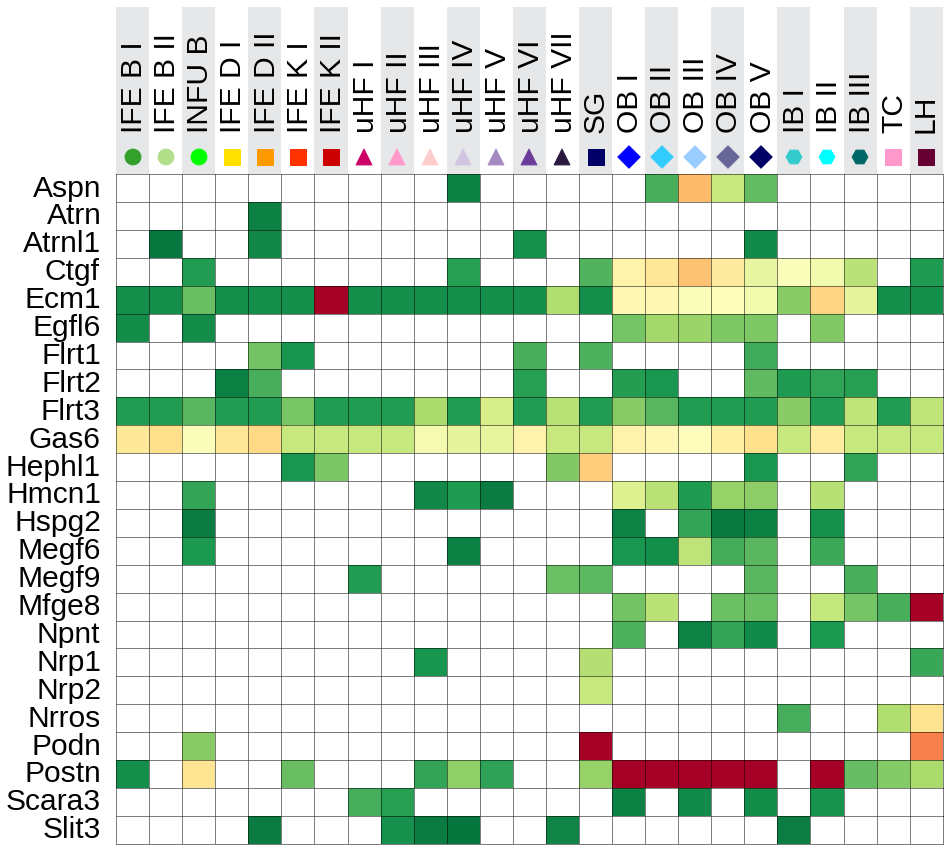

In [139]:
##VERSION A

#define parameters

data = NBR_2nd_size_zero.swaplevel(0,1).ix['median']
genes = ECM_other
groups = data.columns[:-1]
cmap_groups = cmap_2nd
nmap_groups = nmap_2nd_short
markers_groups = markers_2nd

#define gene list

genes = data.ix[genes, groups].max(axis = 1)[data.ix[genes, groups].max(axis = 1) > 0].index

#initialize figure

height = 0.5 * len(genes) + 3
width = 0.6 * len(groups) + 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(len(genes) + 1, 
                  len(groups) + 1, 
                  hspace=0.0, 
                  wspace = 0.0,
                  height_ratios = [3] + [0.5] * len(genes),
                  width_ratios = [1] + [0.5] * len(groups))

#define columns labels

for col, gr in enumerate(groups):
    
    ax = plt.subplot(gs[0,col+1])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    if gr == 'Baseline':
        ax.text(0.55, 0.1, 'Baseline', family = 'Liberation Sans', fontsize = 30, 
            va = 'bottom', ha = 'center', rotation = 'vertical')
        
    else:
        ax.scatter(0.5,0.1,color=cmap_groups[int(gr)],marker = markers_groups[int(gr)],s = 250)
        ax.text(0.55, 0.25, nmap_groups[int(gr)], family = 'Liberation Sans', fontsize = 30, 
                va = 'bottom', ha = 'center', rotation = 'vertical')
        
    if col % 2 == 0:
        ax.axvspan(0,1, color = '#E6E7E8', zorder = 0)
    
    clean_axis(ax)
    
#define and plot rows

for ix, g in enumerate(genes):
    
    cmax = np.log10(10 + 1)
    
    cmap = plt.cm.RdYlGn_r
    
    #define label
    
    ax = plt.subplot(gs[ix+1,0])
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0.75, 0.5, g, family = 'Liberation Sans', fontsize = 30, va = 'center', ha = 'right')
    clean_axis(ax)
    
    #define plot
    
    ax = plt.subplot(gs[ix+1,1:])
    ax.set_xlim(0,len(groups))
    ax.set_ylim(0,1)
    remove_ticks(ax)
    
    #plot data
    
    for col, gr in enumerate(groups):
        
        data_tmp = np.log10(data.ix[g, gr] + data.ix[g, 'Baseline'] + 1)
        
        if data_tmp == 0:
            color = 'white'
        else:
            color = cmap(data_tmp/cmax)
                
        ax.axvspan(col, col + 1, color = color)
        
        ax.axvline(col + 1, linewidth = 0.5, color = 'black')
        
figname = 'v1.8_7_C_ECM_other.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Legend

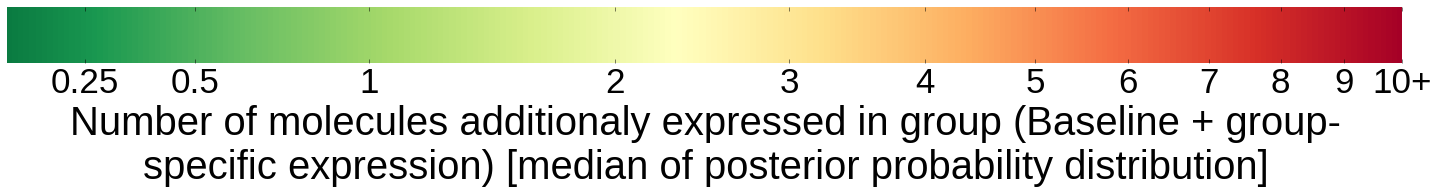

In [140]:
cmap = plt.cm.RdYlGn_r
cmin = np.log10(0.1 + 1)
cmax = np.log10(10 + 1)


#initialize figure

height = 1.0
width = 25
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot()
ax.set_xlim(cmin, cmax)

#plot cmap

for pos in np.arange(0, cmax, 0.001):
    ax.axvspan(pos, pos + 0.001, color = cmap(pos/cmax))
    
clean_axis(ax)
    
#plot ticks

ticks = [0.25, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax.set_xticks([np.log10(x + 1) for x in ticks])
ax.set_xticklabels(['0.25', '0.5', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+'], 
                   family = 'Liberation Sans', fontsize = 35)

#plot label

ax.set_xlabel('Number of molecules additionaly expressed in group (Baseline + group-\nspecific expression) [median of posterior probability distribution]', family = 'Liberation Sans', fontsize = 40)

figname = 'v1.8_7_Legend.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)